In [1]:
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt

from AdaBins import model_io
from AdaBins.models import UnetAdaptiveBins

MIN_DEPTH = 1e-3
MAX_DEPTH_NYU = 10
MAX_DEPTH_KITTI = 80

N_BINS = 256

PRETRAINED_PATH_NYU = "./weights/AdaBins_nyu.pt"
PRETRAINED_PATH_KITTI = "./weights/AdaBins_kitti.pt"

In [2]:
def load_image(image_path):
    image = Image.open(image_path)
    image = np.array(image).astype(np.float32) / 255.0
    image = torch.Tensor(image).permute(2, 0, 1).unsqueeze(0)
    return image

In [3]:
def output2depth(output):
    return output.squeeze().detach().numpy()

### KITTI-Depth

In [4]:
model = UnetAdaptiveBins.build(n_bins=N_BINS, min_val=MIN_DEPTH, max_val=MAX_DEPTH_KITTI)

model, _, _ = model_io.load_checkpoint(PRETRAINED_PATH_KITTI, model)

Loading base model ()...

Using cache found in /Users/andreadalcin/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.


/Users/andreadalcin/miniconda3/envs/DNN3D/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [5]:
image = load_image("./data/kitti-depth/01.png")
_, output = model(image)

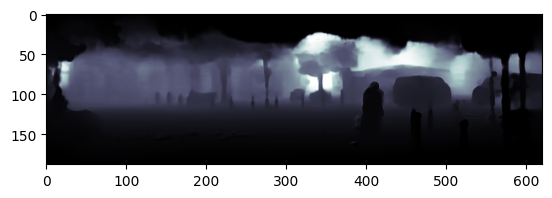

In [6]:
depth = output2depth(output)
_ = plt.imshow(depth, cmap="bone")

### NYU

Loading base model ()...

Using cache found in /Users/andreadalcin/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.


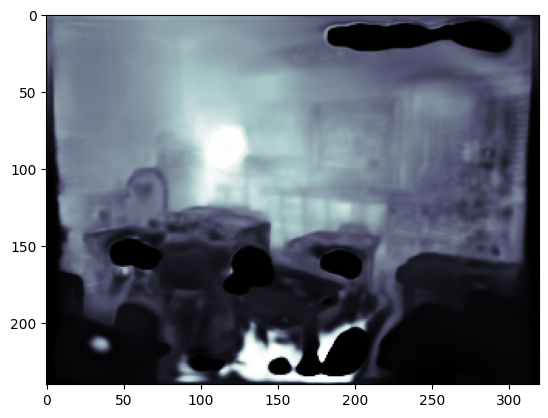

In [7]:
model = UnetAdaptiveBins.build(n_bins=N_BINS, min_val=MIN_DEPTH, max_val=MAX_DEPTH_NYU)
model, _, _ = model_io.load_checkpoint(PRETRAINED_PATH_NYU, model)

image = load_image("./data/nyu/01.jpg")
_, output = model(image)
depth = output2depth(output)

_ = plt.imshow(depth, cmap="bone")